<a href="https://colab.research.google.com/github/KiSobral/Data-Imersion/blob/main/mod01/classes_02_03_04_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeiro Módulo - Aulas 02, 03, 04 e 05


O primeiro módulo do bootcamp introduz os pilares básicos de uma anáálise de dados.

## O que é abordado
Neste notebook, os seguintes conteúdos da segunda aula foram abordados:
  - Como realizar um slice no DataFrame com Pandas;
  - Formas de lidar com dados faltantes;
  - Utilizar o insert do Pandas;
  - Como transpor sua matriz de dados.

Neste notebook, os seguintes conteúdos da terceira aula foram abordados:
  - Como os números pseudo aleatórios são gerados;
  - Como obter uma amostra aleatória dos dados;
  - Como manipular os dados para plotar informações dos estados de desejo, através de ordenação;
  - O que são séries temporais.

Neste notebook, os seguintes conteúdos da quarta aula foram abordados:
  - Como olhar e interpretar um gráfico de linhas realizando comparações;
  - Como a manipulação dos gráficos pode transmitir uma informação falsa.

Neste notebook, os seguintes conteúdos da quinta aula foram abordados:
  - Como os dados represados podem impactar os dados;
  - Quais as dificuldades de interpretar e realizar comparações em um gráfico de pizza;
  - Como utilizar uma tabela para transmitir informações.

## Importação das bibliotecas e inicialização do DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv', encoding='ISO-8859-1',
                 skiprows=3, skipfooter=12, sep=';', thousands=".",
                 decimal=",")
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8.041249e+06,8.199033e+06,8.363386e+06,7.889820e+06,8.603944e+06,8.048398e+06,8.159737e+06,8.457456e+06,7.766983e+06,8.858846e+06,8.407076e+06,9.492939e+06,8.206196e+06,9.011613e+06,9.124968e+06,8.406733e+06,8.411360e+06,8.651082e+06,8.193426e+06,8.388269e+06,8.645316e+06,9.050329e+06,9.211263e+06,9.490545e+06,8.600886e+06,8.919191e+06,8.909112e+06,8.409386e+06,8.924348e+06,8.948606e+06,8.660753e+06,8.326416e+06,8.413784e+06,7.174312e+06,7.423679e+06,8.581195e+06,9.193594e+06,7.407388e+06,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3.355223e+06,3.562692e+06,3.375297e+06,3.341498e+06,3.358378e+06,3.145385e+06,2.638774e+06,2.968169e+06,2.769797e+06,3.057632e+06,2.874965e+06,3.175575e+06,3.060903e+06,3.253012e+06,3.040645e+06,2.926179e+06,3.126121e+06,2.473455e+06,2.277493e+06,2.594347e+06,2.234388e+06,2.473008e+06,2.979765e+06,3.070534e+06,3.249053e+06,3.567539e+06,2.981073e+06,2.998860e+06,3.293379e+06,3.174249e+06,2.959569e+06,3.261124e+06,2.981264e+06,2.859102e+06,2.472063e+06,2.383895e+06,2.199921e+06,1.163813e+06,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,1.371883e+07,1.439621e+07,1.374530e+07,1.397979e+07,1.389552e+07,1.351812e+07,1.363519e+07,1.454945e+07,1.275356e+07,1.474941e+07,1.457793e+07,1.538106e+07,1.465365e+07,1.554460e+07,1.637496e+07,1.534334e+07,1.624996e+07,1.425541e+07,1.427405e+07,1.535891e+07,1.410007e+07,1.610397e+07,1.615449e+07,1.652998e+07,1.550998e+07,1.664222e+07,1.649372e+07,1.534632e+07,1.628244e+07,1.478133e+07,1.492338e+07,1.593956e+07,1.513811e+07,1.477374e+07,1.633091e+07,1.944115e+07,1.750933e+07,1.335851e+07,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2.699214e+06,2.682746e+06,2.891100e+06,2.737678e+06,2.693726e+06,2.671452e+06,2.688316e+06,2.740952e+06,2.478349e+06,2.674959e+06,2.721261e+06,2.844812e+06,2.967161e+06,2.841588e+06,3.328231e+06,2.878691e+06,2.964324e+06,2.524712e+06,2.462452e+06,2.662240e+06,2.499996e+06,2.846136e+06,2.789823e+06,2.839390e+06,2.647540e+06,2.865778e+06,3.181322e+06,3.070437e+06,3.162342e+06,3.121105e+06,2.889970e+06,3.084561e+06,2.967159e+06,2.813954e+06,2.304961e+06,2.910776e+06,3.216467e+06,2.739498e+06,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3.180860e+07,3.213313e+07,3.377056e+07,3.297993e+07,3.366504e+07,3.347555e+07,3.206793e+07,3.361584e+07,3.062349e+07,3.412193e+07,3.503995e+07,3.542461e+07,3.416028e+07,3.448495e+07,3.561836e+07,3.438092e+07,3.844109e+07,3.358354e+07,3.278935e+07,3.451353e+07,3.188592e+07,3.323616e+07,3.100892e+07,3.106411e+07,2.854318e+07,3.671393e+07,3.646201e+07,3.679076e+07,3.697486e+07,3.555552e+07,3.522263e+07,3.700982e+07,3.463570e+07,3.474910e+07,2.871497e+07,4.124850e+07,3.539603e+07,2.761873e+07,11559714.54,4.437116e+09
5,16 Amapá,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2.128578e+06,1.873121e+06,1.990850e+06,1.920808e+06,1.915177e+06,1.782927e+06,1.610779e+06,1.888217e+06,1.756846e+06,1.8

## Adição de uma coluna relacionada a região no DataFrame

In [3]:
region_map = {
    "1": "Norte",
    "2": "Nordeste",
    "3": "Sudeste",
    "4": "Sul",
    "5": "Centro-Oeste",
}
df['Região'] = [region_map[i[0]] for i in df['Unidade da Federação']]
df.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,Região
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08,Norte
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08,Norte
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09,Norte
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08,Norte
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09,Norte


## Resgate de todas as colunas populadas em todos os estados

In [4]:
useful_columns = df.mean().index.tolist()
useful_columns.insert(0, 'Unidade da Federação')
useful_columns.insert(-1, 'Região')
useful_columns

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


## Criação e ordenação de um novo DataFrame apenas com os dados relevantes

In [5]:
useful_data = df[useful_columns]

In [6]:
useful_data['Unidade da Federação'] = useful_data['Unidade da Federação'].apply(lambda x: x[3:])
useful_data = useful_data.set_index('Unidade da Federação')
useful_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Região,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,Norte,9.291297e+08
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,Norte,4.206680e+08
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,Norte,1.771655e+09
Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,

In [7]:
useful_data = useful_data.sort_values("Total", ascending=False)
useful_data = useful_data.drop("Total", axis=1)

## Resgate e visualização de uma amostra aleatória dos dados

In [8]:
random_states = useful_data.sample(5)

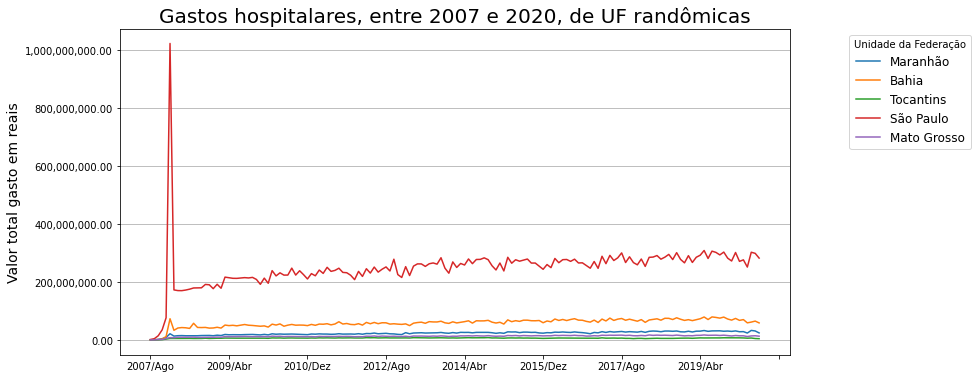

In [9]:
ax = random_states.T.drop("Região").plot(figsize=(12,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valor total gasto em reais", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.28,1), title='Unidade da Federação', fontsize=12)
plt.title("Gastos hospitalares, entre 2007 e 2020, de UF randômicas", fontsize=20)
plt.grid(axis='y')

## Visualização dos gastos hospitalares do Distrito Federal

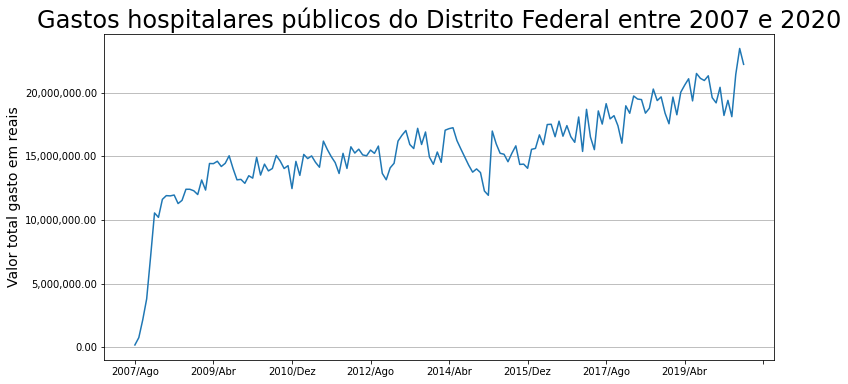

In [10]:
ax = useful_data.loc['Distrito Federal'].drop("Região").plot(figsize=(12,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valor total gasto em reais", fontsize=14)
ax.set_xlabel
plt.title("Gastos hospitalares públicos do Distrito Federal entre 2007 e 2020", fontsize=24)
plt.grid(axis='y')

## Visualização dos gastos das 5 UF's que mais investem em saúde

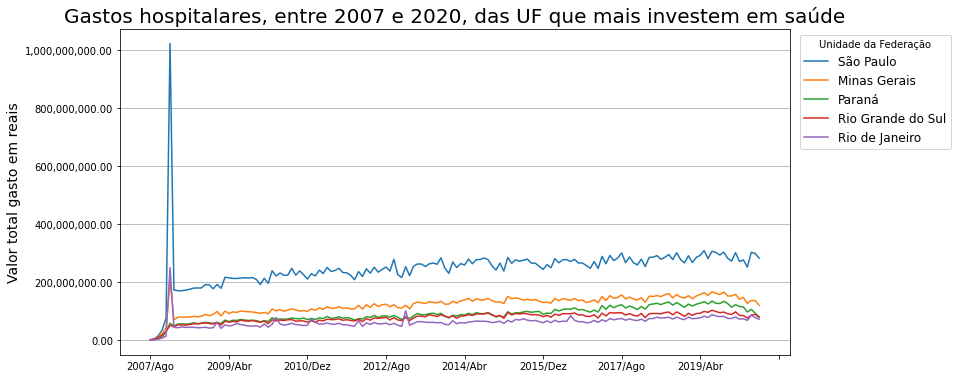

In [11]:
ax = useful_data.head().T.drop("Região").plot(figsize=(12,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valor total gasto em reais", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.25,1), title='Unidade da Federação', fontsize=12)
plt.title("Gastos hospitalares, entre 2007 e 2020, das UF que mais investem em saúde", fontsize=20)
plt.grid(axis='y')

## Comparação do Distrito Federal com as 5 UF's que mais investem em saúde

In [12]:
UF_plot = useful_data.head().index.tolist()
UF_plot.append("Distrito Federal")


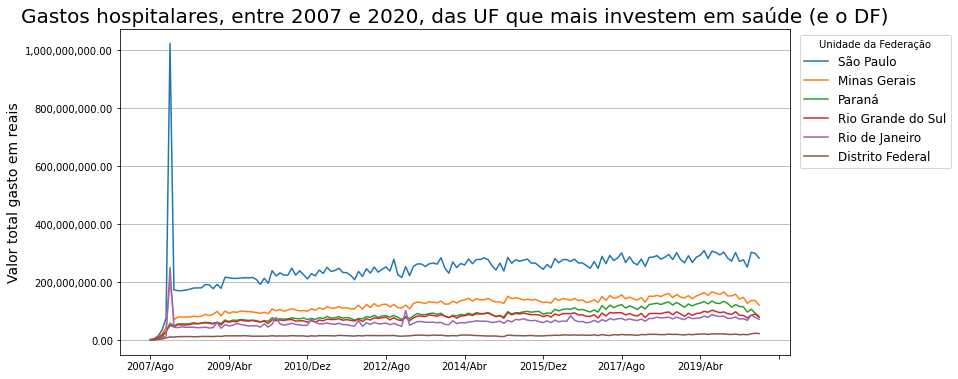

In [13]:
ax = useful_data.loc[UF_plot].T.drop("Região").plot(figsize=(12,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valor total gasto em reais", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.25,1), title='Unidade da Federação', fontsize=12)
plt.title("Gastos hospitalares, entre 2007 e 2020, das UF que mais investem em saúde (e o DF)", fontsize=20)
plt.grid(axis='y')

## Recorte e refinamento da visualização dos dados

### Visualização dos dados com um intervalo menor

In [14]:
useful_columns = useful_data.columns[6:]

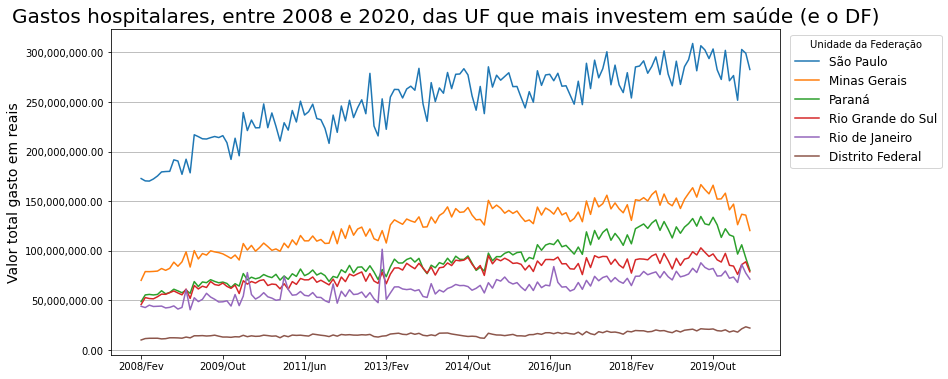

In [15]:
ax = useful_data.loc[UF_plot][useful_columns].T.drop("Região").plot(figsize=(12,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valor total gasto em reais", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.25,1), title='Unidade da Federação', fontsize=12)
plt.title("Gastos hospitalares, entre 2008 e 2020, das UF que mais investem em saúde (e o DF)", fontsize=20)
plt.grid(axis='y')

### Visualização dos dados com uma grandeza de medida de R$ em escala menor

In [16]:
regiao = useful_data['Região']
useful_data = useful_data[useful_data.columns[:-1]] / 1000000
useful_data['Região'] = regiao

In [17]:
useful_data.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,1.665350,4.434169,14.577396,35.032260,76.668547,1023.564534,172.834915,170.481850,170.278286,172.402181,175.416596,179.525002,179.898070,180.082204,191.685220,190.539739,177.086381,192.321557,178.596377,216.951592,215.053018,212.890248,212.670901,214.041237,215.212536,214.135444,216.056583,208.973892,192.127099,213.467886,195.784795,239.323932,221.172991,231.777549,223.933799,224.067914,248.010131,224.052980,238.935453,225.484059,...,292.113405,274.301073,283.534617,300.593739,267.297244,287.114784,267.113249,259.451686,279.497571,254.004628,285.270560,286.191965,291.440947,278.926018,285.851920,295.419311,277.576166,301.454867,278.114302,266.239801,291.081407,267.662509,285.576313,292.584828,308.925598,281.405147,306.633988,302.367277,293.685713,303.382527,282.391773,272.697695,301.991168,271.356784,276.606289,251.696363,302.857661,299.060852,282.709570,Sudeste
Minas Gerais,0.971394,2.861782,10.018011,21.730282,43.429518,205.912744,70.301090,79.119006,79.046322,79.268070,79.608653,82.200224,80.374117,82.400147,88.613477,84.486996,88.928630,99.018156,83.675120,100.240652,91.831325,97.289703,95.723397,100.050009,98.968065,98.202119,96.962394,94.767639,92.412771,95.806556,90.764890,107.389850,100.829767,105.485568,99.666116,103.356996,107.844260,104.341138,100.525404,101.943625,...,153.412120,144.291438,147.533497,156.055553,142.285104,148.306094,142.323945,138.341192,146.501618,130.702126,151.496245,150.687603,153.589259,150.251751,156.633990,160.420043,145.941008,157.247580,148.172784,145.387241,153.177305,142.669154,151.943631,157.922599,163.591462,154.114823,166.735650,161.707825,157.419732,166.133803,152.106660,152.398599,158.097904,141.323176,147.078556,126.330650,136.867276,135.977572,120.467187,Sudeste
Paraná,0.554800,1.431708,4.630402,11.120031,28.790723,58.081334,48.855046,55.611791,56.115136,55.574832,56.094755,59.802402,56.699001,58.091986,61.365941,59.667209,57.816198,60.381594,57.239102,69.070488,64.054678,68.685543,67.931227,70.958763,69.225784,67.849969,68.558209,67.158497,63.094274,66.902644,64.501134,77.138871,70.755397,73.456757,71.839021,73.013831,76.151007,74.240963,73.042387,76.364750,...,120.535313,111.725261,118.590172,122.122836,110.656148,117.567692,112.457523,105.558123,116.133193,107.075982,122.331355,124.731345,127.073853,122.616924,127.991901,131.257163,120.647377,129.530164,121.810669,112.984631,124.159240,117.715473,123.907372,127.447034,132.576563,124.858292,134.621316,127.174095,126.172680,133.847978,126.209369,113.545319,122.268754,116.061603,114.476998,96.727112,106.103738,92.901461,80.320853,Sul
Rio Grande do Sul,1.049252,3.182913,8.571312,16.592433,30.134256,51.064610,45.897705,52.928696,51.972417,51.679351,53.759674,56.391648,56.233759,57.910171,59.592125,57.565742,55.696921,61.522380,52.101638,65.111965,61.590829,64.402292,63.090641,69.137005,66.062630,65.222011,67.569409,64.189115,62.244283,65.488388,56.964528,69.933577,66.486836,69.108367,67.570770,70.074755,70.884009,65.079795,66.556016,66.097031,...,95.149949,93.172415,94.415258,94.228158,86.424774,91.598179,85.793700,82.737574,91.825672,77.582012,91.078325,91.926774,91.678132,90.989888,94.861008,96.799643,87.344269,

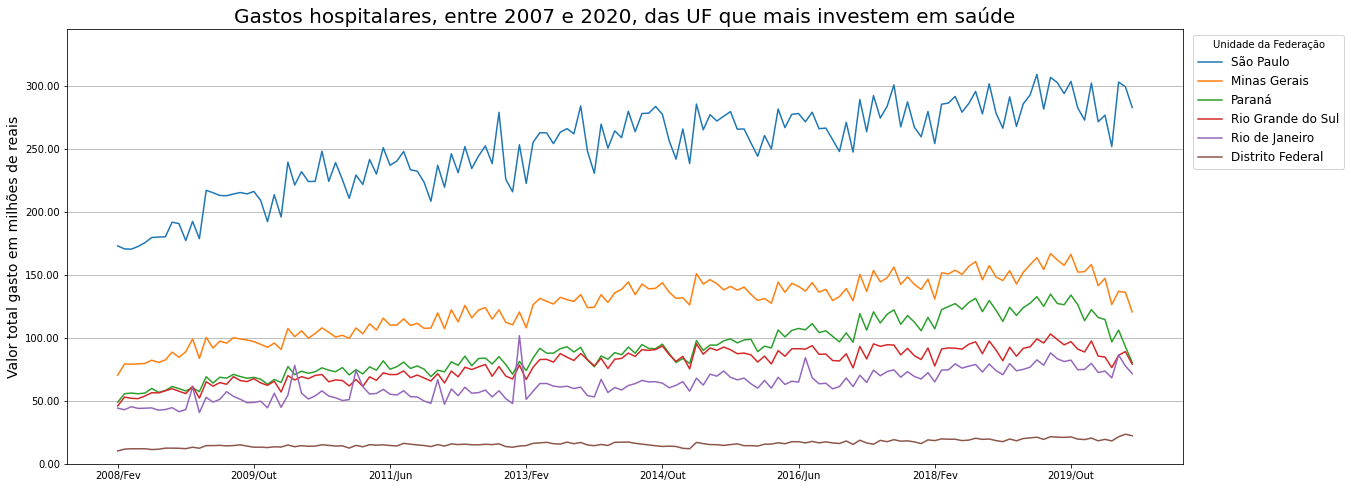

In [18]:
ax = useful_data.loc[UF_plot][useful_columns].T.drop("Região").plot(figsize=(20,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valor total gasto em milhões de reais", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.15,1), title='Unidade da Federação', fontsize=12)
plt.ylim(0, 345)
plt.title("Gastos hospitalares, entre 2007 e 2020, das UF que mais investem em saúde", fontsize=20)
plt.grid(axis='y')

## Visualização dos gastos em Julho de 2020

In [19]:
useful_columns

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Região'],
      dtype='object', length=151)

In [20]:
last_month_expenses = useful_data[useful_columns[-2]]
last_month_expenses = last_month_expenses.sort_values(ascending=False)
last_month_expenses

Unidade da Federação
São Paulo              282.709570
Minas Gerais           120.467187
Paraná                  80.320853
Rio Grande do Sul       78.929704
Rio de Janeiro          71.540227
Pernambuco              62.325444
Bahia                   58.898100
Santa Catarina          51.764535
Goiás                   33.499284
Ceará                   30.809221
Pará                    27.618728
Espírito Santo          27.460475
Maranhão                24.374205
Distrito Federal        22.233542
Rio Grande do Norte     19.593057
Piauí                   18.019214
Paraíba                 15.491469
Amazonas                13.358514
Alagoas                 13.087850
Mato Grosso             13.083152
Mato Grosso do Sul      12.508717
Rondônia                 7.407388
Tocantins                4.489666
Sergipe                  3.312766
Roraima                  2.739498
Amapá                    2.155083
Acre                     1.163813
Name: 2020/Jul, dtype: float64

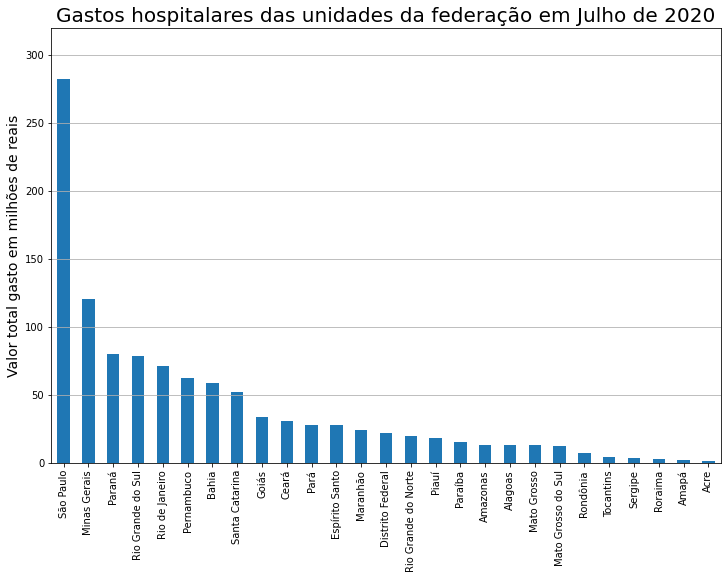

In [21]:
ax = last_month_expenses.plot(kind="bar", figsize=(12,8))
ax.set_ylabel("Valor total gasto em milhões de reais", fontsize=14)
ax.set_xlabel("")
plt.ylim(0, 320)
plt.title("Gastos hospitalares das unidades da federação em Julho de 2020", fontsize=20)
plt.grid(axis='y')

## Gastos em relação ao Distrito Federal

In [22]:
DF_proportion = last_month_expenses / last_month_expenses.loc['Distrito Federal']
DF_proportion

Unidade da Federação
São Paulo              12.715453
Minas Gerais            5.418263
Paraná                  3.612598
Rio Grande do Sul       3.550028
Rio de Janeiro          3.217671
Pernambuco              2.803217
Bahia                   2.649065
Santa Catarina          2.328218
Goiás                   1.506700
Ceará                   1.385709
Pará                    1.242210
Espírito Santo          1.235092
Maranhão                1.096281
Distrito Federal        1.000000
Rio Grande do Norte     0.881239
Piauí                   0.810452
Paraíba                 0.696761
Amazonas                0.600827
Alagoas                 0.588653
Mato Grosso             0.588442
Mato Grosso do Sul      0.562606
Rondônia                0.333163
Tocantins               0.201932
Sergipe                 0.148999
Roraima                 0.123215
Amapá                   0.096929
Acre                    0.052345
Name: 2020/Jul, dtype: float64

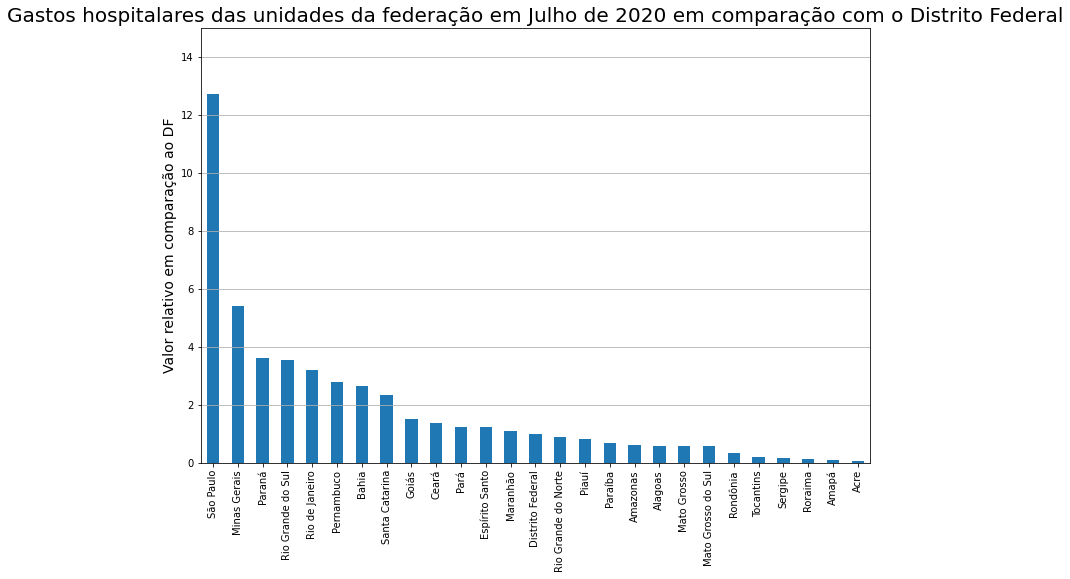

In [23]:
ax = DF_proportion.plot(kind="bar", figsize=(12,8))
ax.set_ylabel("Valor relativo em comparação ao DF", fontsize=14)
ax.set_xlabel("")
plt.ylim(0, 15)
plt.title("Gastos hospitalares das unidades da federação em Julho de 2020 em comparação com o Distrito Federal", fontsize=20)
plt.grid(axis='y')

## Comparação entre DF e RS sobre os gastos, proporcionais a população, com a saúde 

In [24]:
comp = useful_data[useful_columns[-2]].loc[['Distrito Federal', 'Rio Grande do Sul']]
comp

Unidade da Federação
Distrito Federal     22.233542
Rio Grande do Sul    78.929704
Name: 2020/Jul, dtype: float64

In [25]:
comp = comp.sort_values(ascending=False)

In [26]:
comp['Distrito Federal'] = comp['Distrito Federal'] / 2.57

In [27]:
comp['Rio Grande do Sul'] = comp['Rio Grande do Sul'] / 11.29

In [28]:
comp = comp.sort_values(ascending=False)

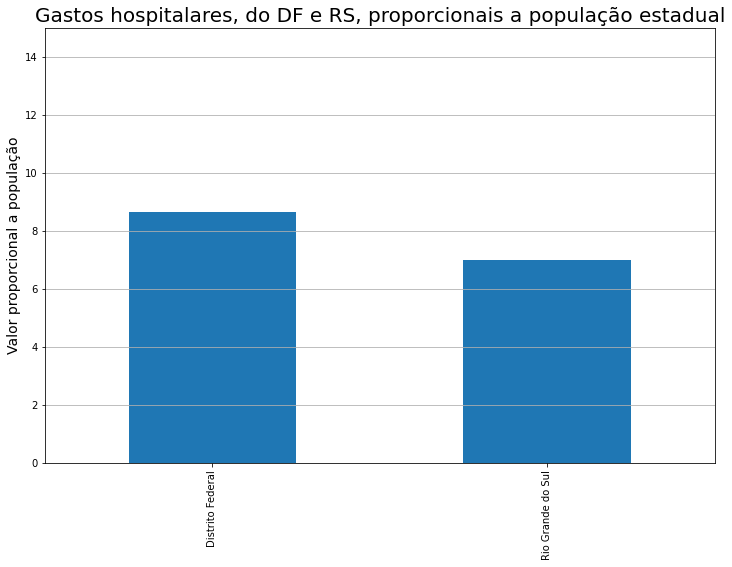

In [29]:
ax = comp.plot(kind="bar", figsize=(12,8))
ax.set_ylabel("Valor proporcional a população", fontsize=14)
ax.set_xlabel("")
plt.ylim(0, 15)
plt.title("Gastos hospitalares, do DF e RS, proporcionais a população estadual", fontsize=20)
plt.grid(axis='y')